https://www.youtube.com/watch?v=ve6gtpZV83E

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 반영하는데 기울기가 양수이면 감소, 음수이면 증가
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.


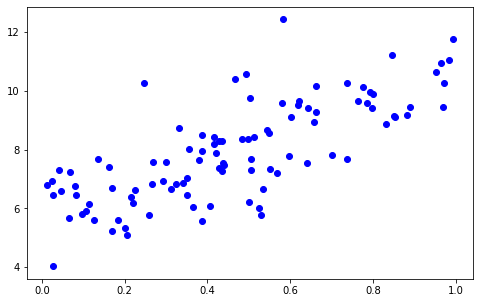

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
np.random.seed(2)
X = np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)
plt.scatter(X,y,c='blue')

In [1]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [7]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [8]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=10000)
print(f'w1:{w1[0,0]:.3f}w0:{w0[0,0]:.3f}')
y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost:{get_cost(y,y_pred)}')

w1:4.795w0:5.741
Gradient Descent Total Cost:1.2302457067763495


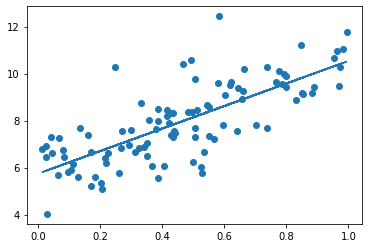

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred)